In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


## Metrics 
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler

## For ML Models:
from sklearn.linear_model import LogisticRegression,LinearRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import random


In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)

In [4]:
y_test

21781    0
16129    1
12830    0
20940    1
18392    1
        ..
27097    0
6161     1
28543    0
3388     0
3310     1
Name: loan_status, Length: 8592, dtype: int64

In [5]:
print(f'X Test Shape: {X_test.shape}')
print(f'y Test Shape: {y_test.shape}')
print(f'X Train Shape: {X_train.shape}')
print(f'y Train Shape: {y_train.shape}')


X Test Shape: (8592, 11)
y Test Shape: (8592,)
X Train Shape: (20046, 11)
y Train Shape: (20046,)


## Creating the Pipeline will require:
* Preprocessing numerical features:
    1. StandardScaler - To balance scale among features 
*
* Applying SMOTE to handle imbalance in our Target variable

## Function for Model Results

In [ ]:
def results(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    disp.plot()

    #ROC Curve
    if hasattr(model, 'decision_function'):
        if hasattr(model, 'predict_log_proba'):
            # For RandomForestClassifier
            scores = model.predict_log_proba(X)[:, 1]
        else:
            # For SVM
            scores = model.decision_function(X)

        # Plot ROC curve
        fpr, tpr, threshold = roc_curve(y, scores)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('R.O.I Curve')
        plt.legend(loc='lower right')
        plt.show()
        # Obtain decision score


In [7]:
numericals = list(X.select_dtypes(['float64','int64']).columns)
numericals

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [8]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),numericals),],remainder= 'passthrough')

# LinearRegression|

In [9]:
lr = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', LinearRegression())])

In [10]:
lr.fit(X_train,y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.083


### Linear Regression performs poorly with a model score of only 0.079, which suggests that linear regression is not suitable for this classification task. Linear regression is more suitable for regression tasks where the target variable is continuous.

# LogisticRegression 

In [11]:
logreg = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', LogisticRegression())])

In [12]:
logreg.fit(X_train,y_train)
print("model score: %.3f" % logreg.score(X_test, y_test))

model score: 0.782


Accuracy Score: 0.784196348398683
Precision Score: 0.5
Recall Score: 0.7778548312528895
F1 Score: 0.6087192474674384


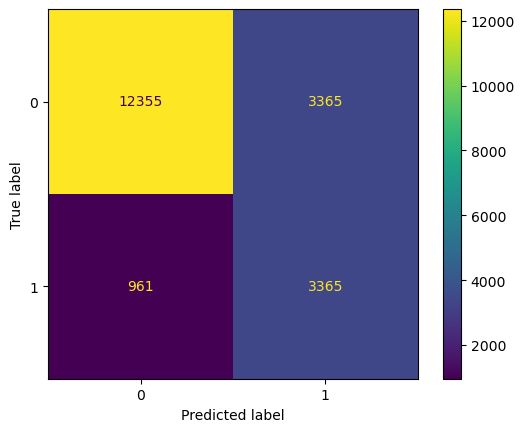

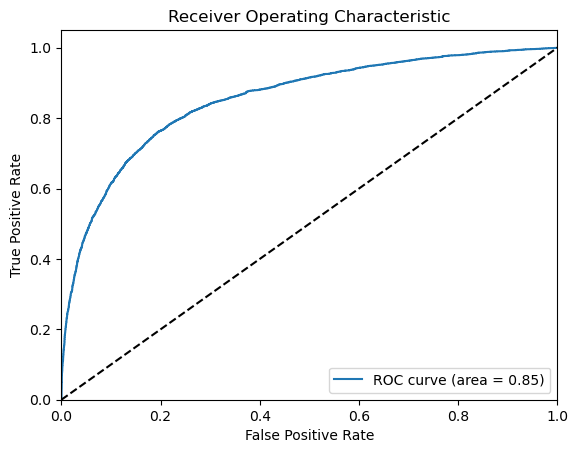

In [13]:
results(logreg,X_train, y_train)

Accuracy Score: 0.7817737430167597
Precision Score: 0.5003501400560224
Recall Score: 0.7613212573255195
F1 Score: 0.6038453412212128


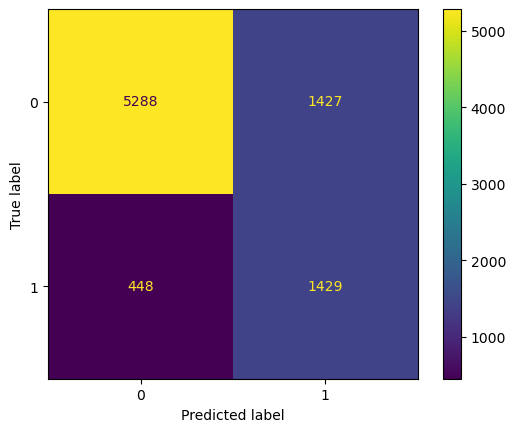

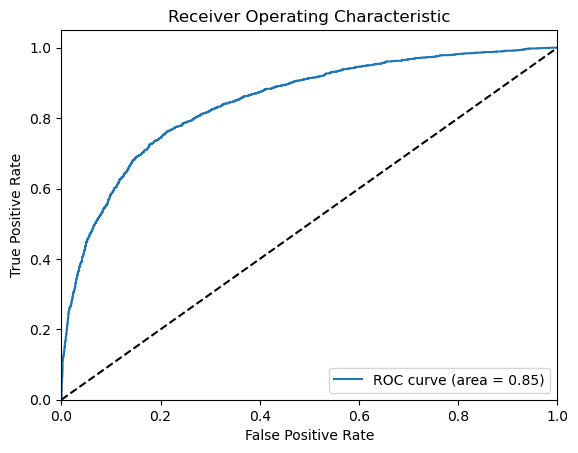

In [14]:
results(logreg,X_test, y_test)

Accuracy Score: 0.7817737430167597
Precision Score: 0.5003501400560224
Recall Score: 0.7613212573255195
F1 Score: 0.6038453412212128


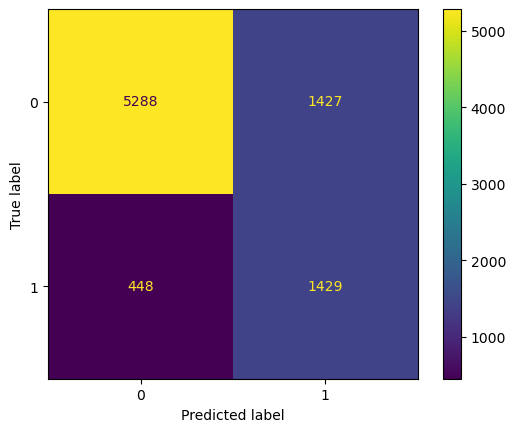

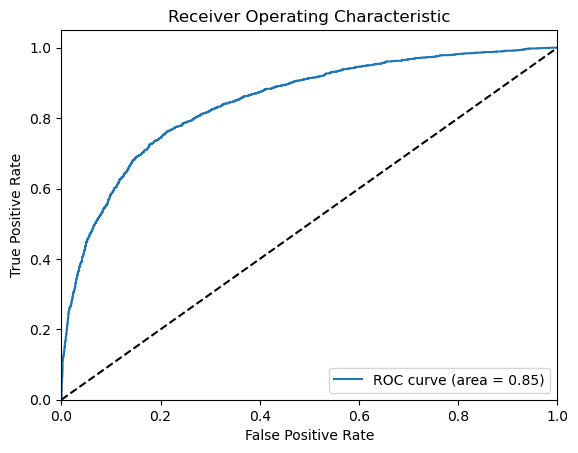

In [15]:
results(logreg,X_test, y_test)

In [16]:
logreg_params = {'classifier__max_iter':[100,1000, 10000],
                 'classifier__solver':['liblinear', 'lbfgs','newton-cg']}

In [17]:
logreg_grid = GridSearchCV(logreg, logreg_params)
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__max_iter': [100, 1000, 10000],
                         'classifier__solver': ['liblinear', 'lbfgs',
                                                'newton-cg']})

In [18]:
logreg_grid.best_params_

{'classifier__max_iter': 1000, 'classifier__solver': 'lbfgs'}

In [19]:
logreg_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_home_ownership',
                                                   'person_emp_length',
                                                   'loan_intent', 'loan_grade',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_default_on_file',
                                                   'cb_person_cred_hist_length'])])),
                ('SMOTE', SMOTE()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [20]:
best_logreg = logreg_grid.best_estimator_

Accuracy Score: 0.7859423326349396
Precision Score: 0.5026232948583421
Recall Score: 0.7750809061488673
F1 Score: 0.6098026734563972


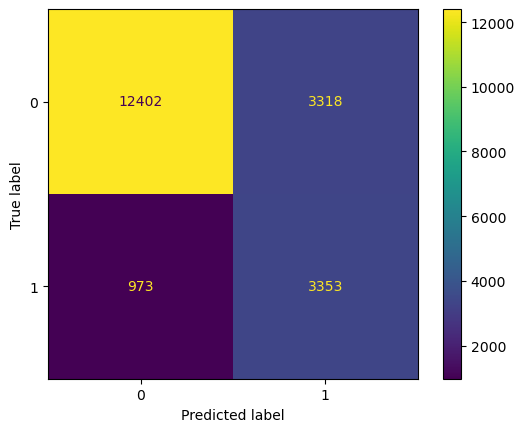

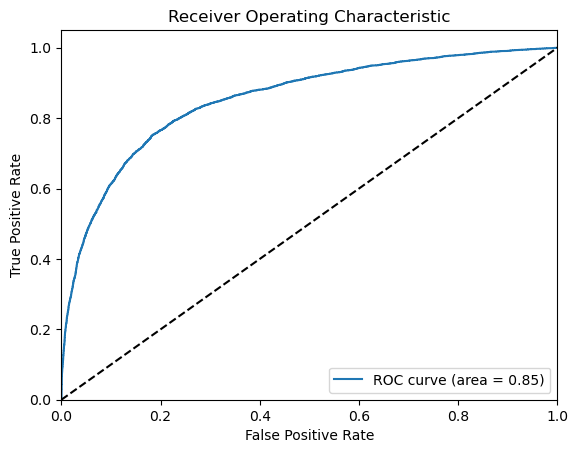

In [21]:
results(best_logreg,X_train,y_train)

Accuracy Score: 0.7818901303538175
Precision Score: 0.5005279831045406
Recall Score: 0.7575919019712307
F1 Score: 0.6027977956761339


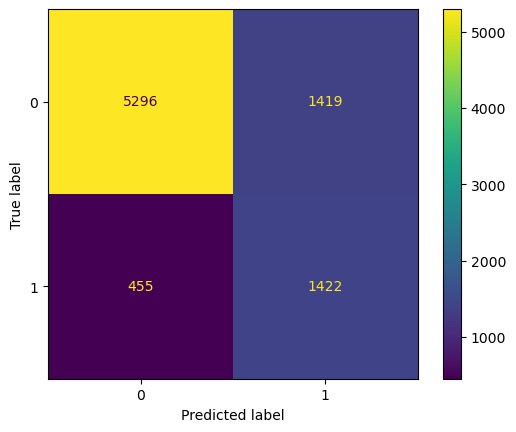

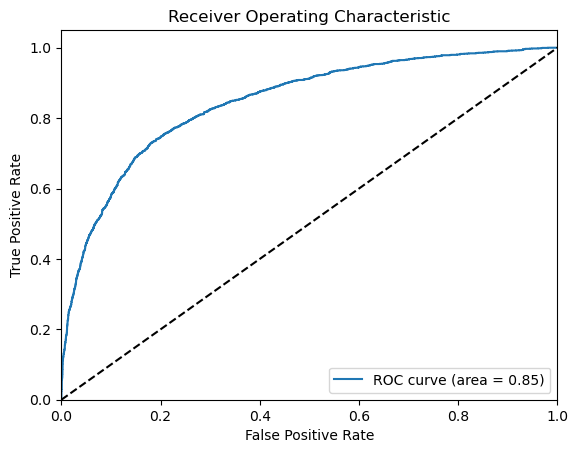

In [22]:
results(best_logreg, X_test, y_test)

These evaluation metrics suggest that the logistic regression model performs reasonably well in predicting loan status, but precision indicates that theres still room for improvement

# RidgeClassifier

In [23]:
rr = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', RidgeClassifier())])

In [24]:
rr.fit(X_train,y_train)
print("model score: %.3f" % rr.score(X_test, y_test))

model score: 0.784


Accuracy Score: 0.7887857926768432
Precision Score: 0.5069866342648846
Recall Score: 0.7716134997688395
F1 Score: 0.6119156736938588


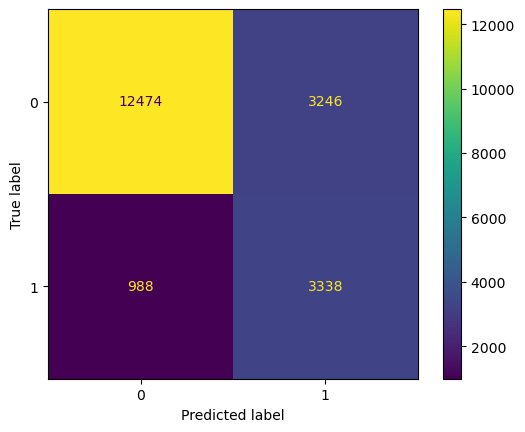

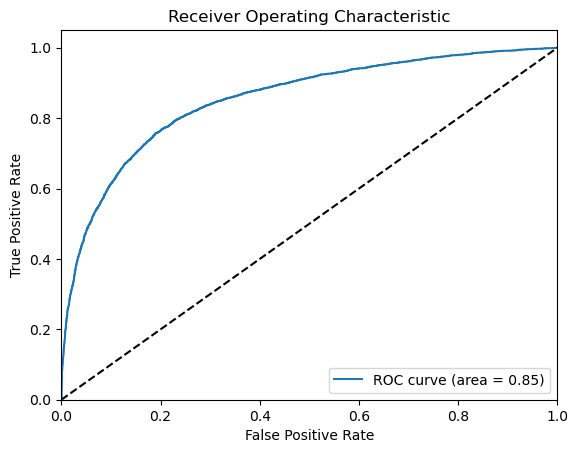

In [25]:
results(rr,X_train,y_train)

Accuracy Score: 0.7844506517690876
Precision Score: 0.5044690740078656
Recall Score: 0.7517314864144912
F1 Score: 0.6037655113393239


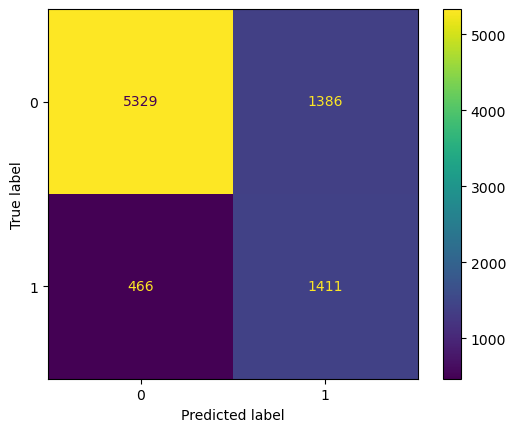

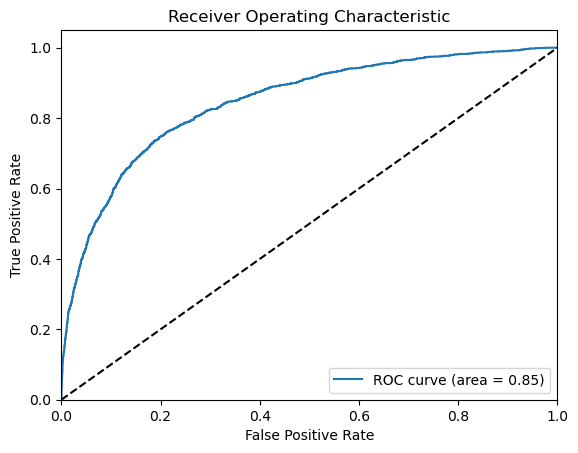

In [26]:
results(rr,X_test,y_test)

In [27]:
rr_params = {
    'classifier__alpha': [0.1, 1.0, 10.0],
    'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'classifier__max_iter': [1000, 5000, 10000]
}

In [28]:
rr_grid = GridSearchCV(rr, rr_params, cv=5)
rr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', RidgeClassifier())]),
             param_grid={'classifier__alpha': [0.1, 1.0, 10.0],
                         'classifier__max_iter': [1000, 5000, 10000],
                         'classifier__solver': ['auto', 'svd', 'cholesky',
                                                'lsqr', 'sparse_cg']})

In [29]:
best_rr = rr_grid.best_estimator_

Accuracy Score: 0.7887359074129502
Precision Score: 0.5069201520912547
Recall Score: 0.7704576976421637
F1 Score: 0.6115035317860746


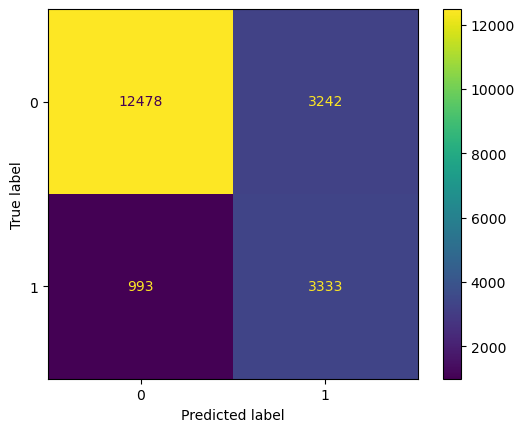

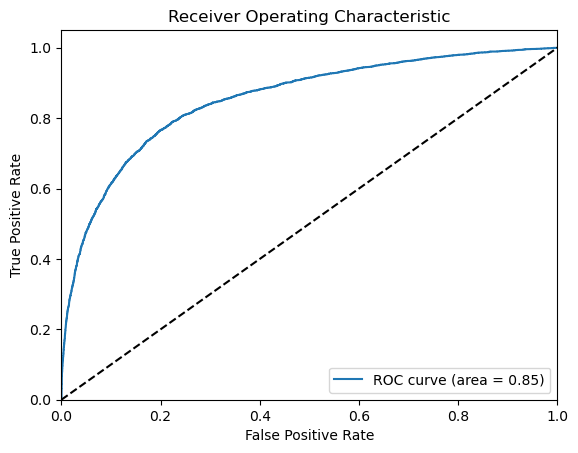

In [30]:
results(best_rr,X_train,y_train)

Accuracy Score: 0.7843342644320298
Precision Score: 0.5042796005706134
Recall Score: 0.7533297815663292
F1 Score: 0.6041444135868405


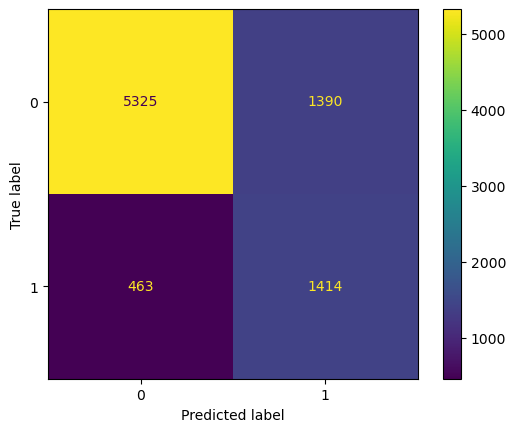

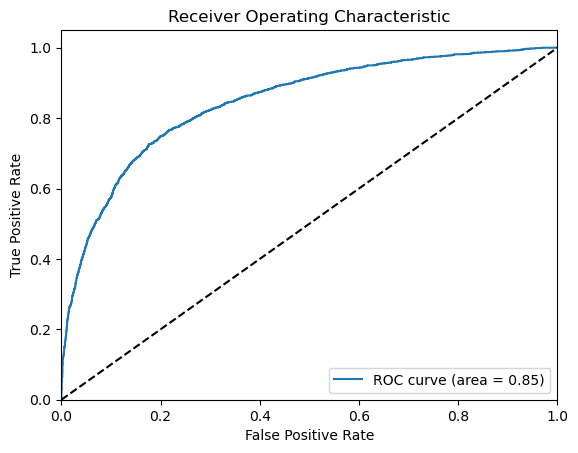

In [31]:
results(best_rr, X_test, y_test)

### Ridge Classifier outperforms Logistic Regression in terms of accuracy and F1 score on both the training and test sets. However, the differences in performance between the two models are relatively small.

# Random Forest 

In [32]:
rf = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', RandomForestClassifier())])

In [33]:
rf.fit(X_train,y_train)
print("RandomForest Classifier score: %.3f" % rf.score(X_test, y_test))

RandomForest Classifier score: 0.923


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


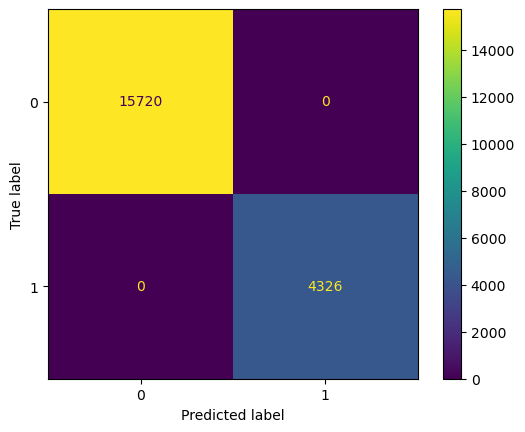

In [34]:
results(rf,X_train,y_train)

Accuracy Score: 0.9231843575418994
Precision Score: 0.9147920927062031
Recall Score: 0.7149706979222163
F1 Score: 0.8026315789473684


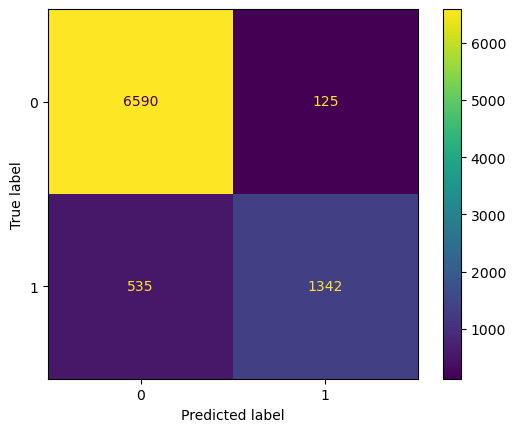

In [35]:
results(rf,X_test,y_test)

In [36]:
rf_params =  {'classifier__criterion': ['gini', 'entropy'], 
               'classifier__max_depth':[15,20],
               'classifier__n_estimators':[50,100],
               'classifier__max_depth':[10,20,30],
               'classifier__min_samples_split': [10,15,20],
               'classifier__min_samples_leaf':[5,10]
             
             }

In [37]:
rf_grid = GridSearchCV(rf,rf_params,cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_leaf': [5, 10],
                         'classifier__min_samples_split': [10, 15, 20],
                         'classifier__n_estimators': [50, 100]})

In [38]:
best_rf_grid = rf_grid.best_estimator_
best_rf_grid.fit(X_train,y_train)
print("RandomForest Classifier Grid score: %.3f" % best_rf_grid.score(X_test, y_test))

RandomForest Classifier Grid score: 0.923


Accuracy Score: 0.9666766437194453
Precision Score: 0.986436170212766
Recall Score: 0.8573740175681923
F1 Score: 0.9173880781597824


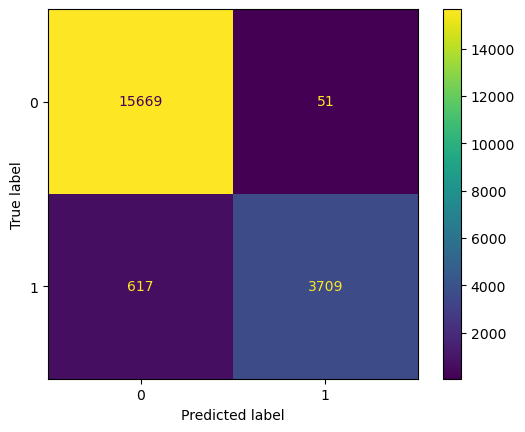

In [39]:
results(best_rf_grid,X_train,y_train)

Accuracy Score: 0.9227188081936686
Precision Score: 0.9106296547054841
Recall Score: 0.7165689930740543
F1 Score: 0.8020274299344067


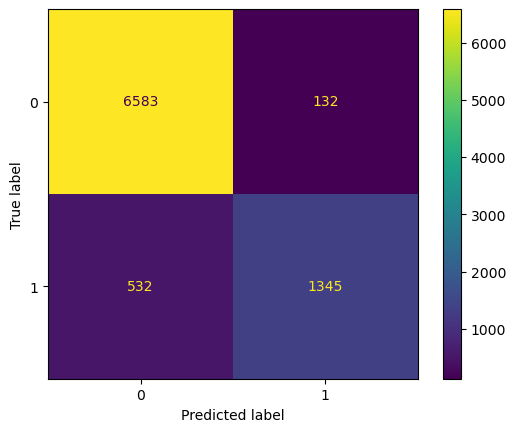

In [40]:
results(best_rf_grid,X_test, y_test)

Overall,RandomForest performs well on the training data, achieving high accuracy and good precision and recall. However, there is a drop in performance when evaluated on the test data, indicating an issue of overfitting

In [41]:
rf2 = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
rf2.fit(X_train, y_train)
print("Adjusted RandomForest Classifier: %.3f" % rf2.score(X_test, y_test))

Adjusted RandomForest Classifier: 0.919


# Support Vector Machine (SVM)

In [42]:
svc = Pipeline([('preprocessor', preprocessor), ('SMOTE',SMOTE()), ('classifier', SVC())])
svc.fit(X_train, y_train)
print("SVM score: %.3f" % svc.score(X_test, y_test))

SVM score: 0.851


In [43]:
svc_params = {'classifier__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'classifier__degree':[3,10,15]}

In [44]:
svc_grid = GridSearchCV(svc,svc_params, cv=5)
svc_grid.fit(X_train,y_train)

c:\Users\thech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\thech\anaconda3\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\thech\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a squ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__degree': [3, 10, 15],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid', 'precomputed']})

In [45]:
best_svc_grid = svc_grid.best_estimator_
best_svc_grid.fit(X_train, y_train)
print("SVC Grid score: %.3f" % best_svc_grid.score(X_test, y_test))

SVC Grid score: 0.852


Accuracy Score: 0.8695500349196847
Precision Score: 0.6720981693824181
Recall Score: 0.7723069810448451
F1 Score: 0.7187264709045929


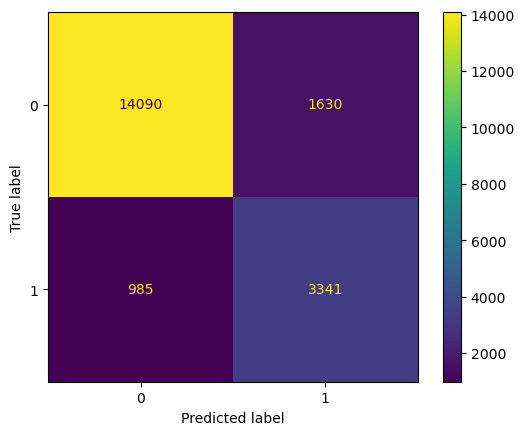

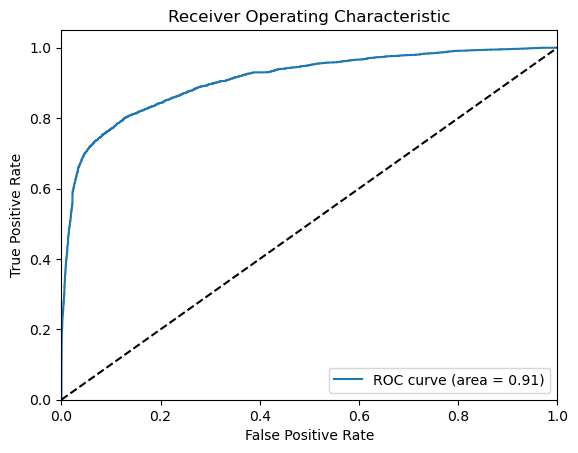

In [46]:
results(best_svc_grid,X_train, y_train) 

Accuracy Score: 0.852304469273743
Precision Score: 0.6411327762302693
Recall Score: 0.7357485348961108
F1 Score: 0.6851897792111138


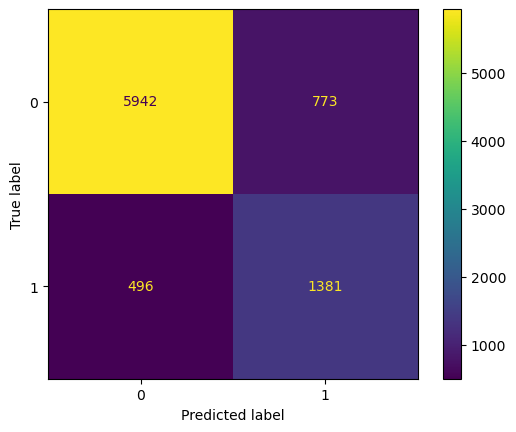

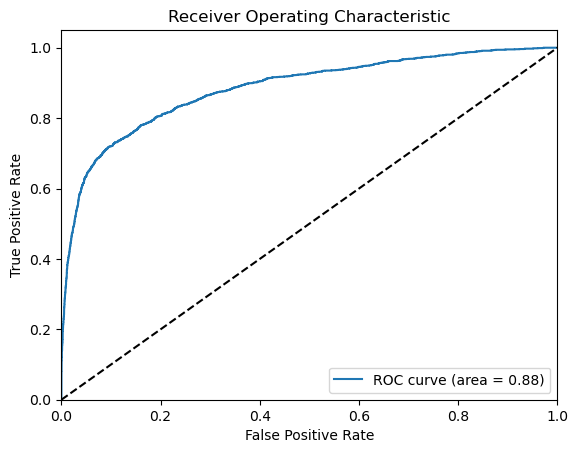

In [47]:
results(best_svc_grid,X_test, y_test)

# eXtreme Gradient Boosting(XGBBClassifier)
* Compared to models already used(Ridge, RandomForest, SVM, etc) XGBoost ideal for capturing complex non-linear relationships between features and targets. XGBoost uses gradient boosting,which combines weak learners(decision trees) additively to improve models performence and can potentially help with overfitting with its regularization techniques including L1 regularization (Lasso) and L2 regularization (Ridge).

In [48]:
XGB = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', XGBClassifier())])
XGB.fit(X_train,y_train)
print("XGB Classifier score: %.3f" % XGB.score(X_test, y_test))

XGB Classifier score: 0.933


In [49]:
xgb_params = {
    'classifier__learning_rate':[0.1,0.001,0.01],
    'classifier__n_estimators':[100,150],
    'classifier__max_depth':[10,15],
    'classifier__subsample':[0.9,0.8],
    'classifier__reg_alpha':[0.1]}

In [50]:
xgb_grid = GridSearchCV(XGB,xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])]...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.001, 0.01],
                         'classifier__max_depth': [10, 15],
                         'classifier__n_estimators': [100, 150],
                         'classifier__reg_alpha': [0.1],
                         'classifier__subsample': [0.9, 0.8]})

In [51]:
best_xgb_grid = xgb_grid.best_estimator_
best_xgb_grid.fit(X_train, y_train)
print("XGB Grid Classifier score: %.3f" % best_xgb_grid.score(X_test, y_test))

XGB Grid Classifier score: 0.931


Accuracy Score: 0.9796468123316372
Precision Score: 0.9984732824427481
Recall Score: 0.9070735090152566
F1 Score: 0.9505813953488372


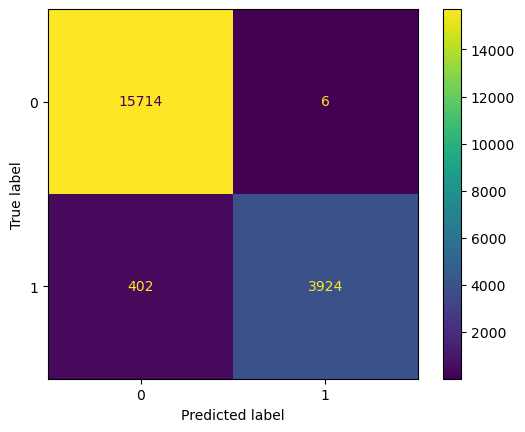

In [52]:
results(best_xgb_grid, X_train, y_train)

Accuracy Score: 0.9314478584729982
Precision Score: 0.9441379310344827
Recall Score: 0.7293553542887586
F1 Score: 0.8229636308987076


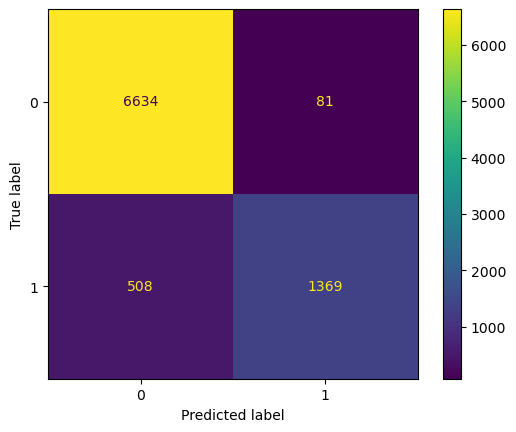

In [53]:
results(best_xgb_grid, X_test, y_test)

# LightGBM Classifier
* Light Gradient Boosting uses a leaf-wise tree growth strategy, as opposed to the level-wise growth strategy used by most gradient boosting algorithms. This approach focuses on growing the tree by expanding the leaf with the highest loss improvement, leading to faster convergence and potentially better accuracy. Compared to above models, it stands out in terms of handling categoricals w/o OHE, customizable loss functions, and quickness.

# Testing Models on Random 

In [54]:
def test_random_row(models, df):
    random_index = random.randint(0, len(df) - 1)
    random_row = df.iloc[random_index]

    features = random_row.drop('loan_status')
    target = random_row['loan_status']

    results = {}
    for model_name, model in models.items():
        score = model.predict_proba([features])[0][target]
        results[model_name] = score

    return results

In [55]:
models = {
    'Logistic Regression': logistic_regression_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model,
    # Add more models as needed
}

results = test_random_row(models, df)


NameError: name 'logistic_regression_model' is not defined